<a href="https://colab.research.google.com/github/janpeter19/CONF_2023_10_MODELICA15/blob/main/BPL_TEST2_PID_Fedbatch_reg6_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BPL_TEST2_Fedbatch script with PyFMI

The key library PyFMI is installed.

After the installation a small application BPL_TEST2_Fedbatch is loaded and run. You can continue with this example if you like.

In [1]:
!lsb_release -a # Actual VM Ubuntu version used by Google

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 22.04.4 LTS
Release:	22.04
Codename:	jammy


In [2]:
%env PYTHONPATH=

env: PYTHONPATH=


In [3]:
!python --version

Python 3.11.11


In [4]:
!wget https://repo.anaconda.com/miniconda/Miniconda3-py311_24.11.1-0-Linux-x86_64.sh
!chmod +x Miniconda3-py311_24.11.1-0-Linux-x86_64.sh
!bash ./Miniconda3-py311_24.11.1-0-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.11/site-packages/')

--2025-02-10 09:48:02--  https://repo.anaconda.com/miniconda/Miniconda3-py311_24.11.1-0-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 145900576 (139M) [application/octet-stream]
Saving to: ‘Miniconda3-py311_24.11.1-0-Linux-x86_64.sh’

Miniconda3-py311_24 100%[===================>] 139.14M   138MB/s    in 1.0s    

2025-02-10 09:48:03 (138 MB/s) - ‘Miniconda3-py311_24.11.1-0-Linux-x86_64.sh’ saved [145900576/145900576]

PREFIX=/usr/local
Unpacking payload ...

Installing base environment...

Preparing transaction: ...working... done
Executing transaction: ...working... done
installation finished.


In [5]:
!conda update -n base -c defaults conda --yes

Channels:
 - defaults
Platform: linux-64
Solving environment: | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.12.31 |       h06a4308_0         128 KB
    certifi-2025.1.31          |  py311h06a4308_0         163 KB
    ------------------------------------------------------------
                                           Total:         291 KB

The following packages will be UPDATED:

  ca-certificates                     2024.11.26-h06a4308_0 --> 2024.12.31-h06a4308_0 
  certifi                         2024.8.30-py311h06a4308_0 --> 2025.1.31-py311h06a4308_0 



certifi-2025.1.31    | 163 KB    | :   0% 0/1 [00:00<?, ?it/s]
certifi-2025.1.31    | 163 KB    | : 100% 1.0/1 [00:00<00:00,  5.45it/s]               
ca-certificates-2024 | 128 KB    | :  50% 0.4997064

In [6]:
!conda --version
!python --version

conda 24.11.1
Python 3.11.11


In [7]:
!conda config --set channel_priority strict

In [8]:
!conda install -c conda-forge pyfmi --yes # Install the key package

Channels:
 - conda-forge
 - defaults
Platform: linux-64
Solving environment: | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - pyfmi


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libgcc_mutex-0.1          |      conda_forge           3 KB  conda-forge
    _openmp_mutex-4.5          |            2_gnu          23 KB  conda-forge
    assimulo-3.6.0             |  py311h083bc19_0         1.1 MB  conda-forge
    ca-certificates-2025.1.31  |       hbcca054_0         154 KB  conda-forge
    conda-25.1.1               |  py311h38be061_0         1.1 MB  conda-forge
    fmilib-2.4.1               |       hac33072_1         383 KB  conda-forge
    gmp-6.3.0                  |       hac33072_2         449 KB  conda-forge
    libamd-3.3.3               |   ss783_h889e182          47 KB  conda-forge
    libblas-3.9.0              |28_h59

# Notes: BPL_TEST2_PID_Fedbatch_reg

This notebook just produce the Figure 6 in the paper "Design ideas behind Bioprocess Library for Modelica", by J P Axelsson, to be presented in the 15th International Modelica Conference in Aachen, Germany, October 9-11, 2023.

Test run for in BPL_TEST2_PID test-case fedbatch_reg that demonstarate substrate control of the feed flow around  fixed exponential dosage scheme. Note, that here is a small drift from mu_ref at the end.

**Note** For the JModelica compilation the derivative part and thus Td, and N cannot be used.
Likely due to usage of MSL 3.2.2


Now specific installation and the run simulations. Start with connecting to Github. Then upload the two files:

* FMU - BPL_TEST2_PID_Fedbatch_reg6_linux_om_me.fmu
* Setup-file - BPL_TEST2_PID_Fedbatch_reg6_explore.me.py

In [9]:
%%bash
git clone https://github.com/janpeter19/CONF_2023_10_MODELICA15

Cloning into 'CONF_2023_10_MODELICA15'...


In [10]:
%cd CONF_2023_10_MODELICA15

/content/CONF_2023_10_MODELICA15


In [11]:
run -i BPL_TEST2_PID_Fedbatch_reg6_explore.py

Linux - run FMU pre-comiled OpenModelica 1.21.0

Model for bioreactor has been setup. Key commands:
 - par()       - change of parameters and initial values
 - init()      - change initial values only
 - simu()      - simulate and plot
 - newplot()   - make a new plot
 - show()      - show plot from previous simulation
 - disp()      - display parameters and initial values from the last simulation
 - describe()  - describe culture, broth, parameters, variables with values/units

Note that both disp() and describe() takes values from the last simulation
and the command process_diagram() brings up the main configuration

Brief information about a command by help(), eg help(simu)
Key system information is listed with the command system_info()


In [12]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [25/2.54, 20/2.54]

In [13]:
import warnings
warnings.filterwarnings("ignore")

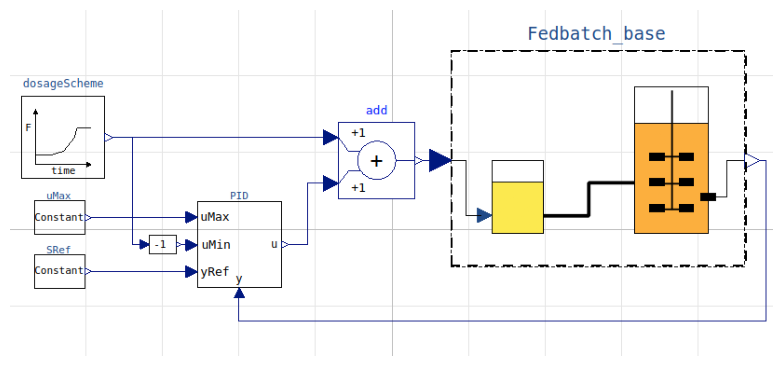

In [14]:
process_diagram()

Could not find cannot import name 'dopri5' from 'assimulo.lib' (/usr/local/lib/python3.11/site-packages/assimulo/lib/__init__.py)
Could not find cannot import name 'rodas' from 'assimulo.lib' (/usr/local/lib/python3.11/site-packages/assimulo/lib/__init__.py)
Could not find cannot import name 'odassl' from 'assimulo.lib' (/usr/local/lib/python3.11/site-packages/assimulo/lib/__init__.py)
Could not find ODEPACK functions.
Could not find RADAR5
Could not find GLIMDA.


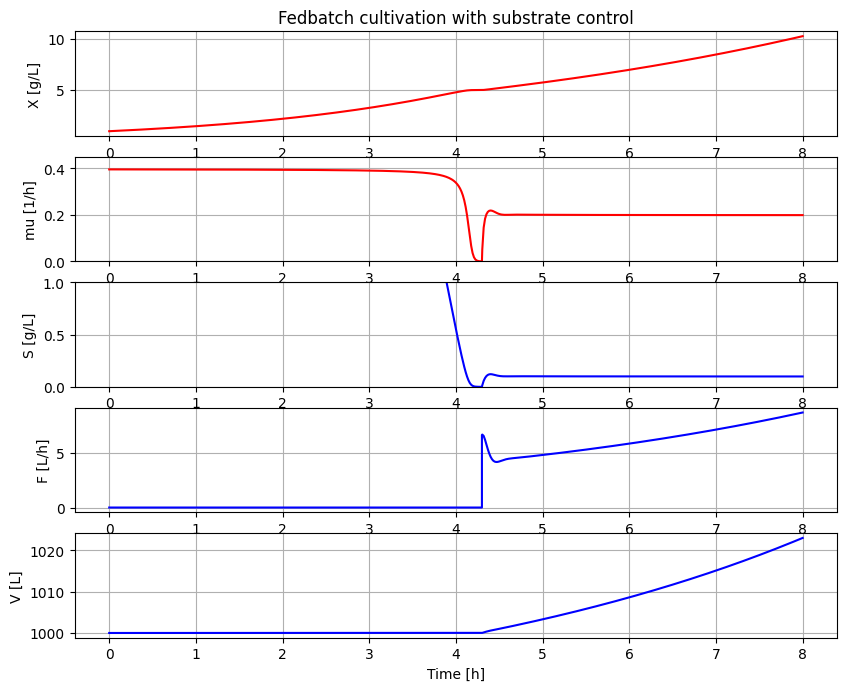

In [15]:
# Simulation of the process with controller
par(Y=0.40, qSmax=1.0, Ks=0.1)                   # Culture parameters
init(V_0=1e3, VX_0=1e3, VS_0=10*1e3)             # Process initialization

par(S_in=600)                                    # Feed profile
par(t_start=4.3, F_start=4, mu_feed=0.2, F_max=35)

par(S_ref=0.1)                                   # Substrate controller
par(t_regStart=4.3)
par(uMax=50)

newplot()
ax2.set_ylim([0, 0.45]); ax3.set_ylim([0, 1])
setLines(['-']);
par(K=30, Ti=0.5)
simu(8)


In [16]:
describe('MSL')

MSL: 3.2.3 - used components: RealInput, RealOutput, LimPID-components


In [17]:
system_info()


System information
 -OS: Linux
 -Python: 3.11.11
 -Scipy: not installed in the notebook
 -PyFMI: 2.16.3
 -FMU by: OpenModelica Compiler OpenModelica 1.21.0
 -FMI: 2.0
 -Type: FMUModelME2
 -Name: BPL_TEST2_PID.Fedbatch_reg6
 -Generated: 2023-08-22T10:54:51Z
 -MSL: 3.2.3
 -Description: Bioprocess Library version 2.1.1-beta
 -Interaction: FMU-explore version 0.9.8
